/usr/local/lib/python3.4/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.4/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.4/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


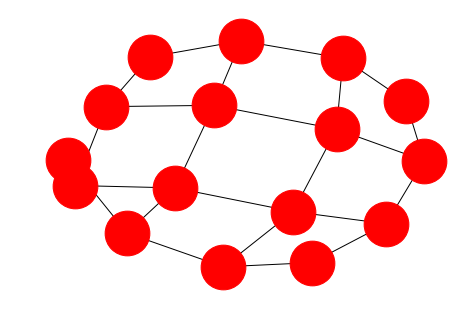

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
L=4

#G = nx.grid_2d_graph(L,L)
G = nx.grid_graph(dim=[L,L])
nx.draw(G,node_size=2000)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import numpy.linalg as linalog

G = nx.Graph()
edge_list = [(1,2,0.1),(1,6,0.15),(2,3,0.15),(2,5,0.1),(3,4,0.15),(6,5,0.2),(5,4,0.1),(6,7,0.3),(7,8,0.1),(5,8,0.3)]
G.add_weighted_edges_from(edge_list)
seed_vertex = [3,8]
unseeded = list(set(G.nodes()) - set(seed_vertex))
l1 = len(seed_vertex)
l2 = len(G.nodes())
L = nx.laplacian_matrix(G,  seed_vertex+unseeded)
L1 = L.todense()
print(L1)

[[ 0.3   0.    0.   -0.15 -0.15  0.    0.    0.  ]
 [ 0.    0.4   0.    0.    0.   -0.3   0.   -0.1 ]
 [ 0.    0.    0.25 -0.1   0.    0.   -0.15  0.  ]
 [-0.15  0.   -0.1   0.35  0.   -0.1   0.    0.  ]
 [-0.15  0.    0.    0.    0.25 -0.1   0.    0.  ]
 [ 0.   -0.3   0.   -0.1  -0.1   0.7  -0.2   0.  ]
 [ 0.    0.   -0.15  0.    0.   -0.2   0.65 -0.3 ]
 [ 0.   -0.1   0.    0.    0.    0.   -0.3   0.4 ]]


In [10]:
L1.item(0)

0.3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import numpy.linalg as linalog


#function with parameters weighted Graph, seeded nodes and the values of each seeded node
def rwalkimagesegmentation(G,seeded):
    m_list = []
    dic ={}
    ls = len(seeded)                                         # lengtth of the seeded nodes
    nodes = G.nodes()                                        # display all nodes in the network
    lt = len(nodes)                                          # length of all the nodes
    unseeded = list(set(nodes) - set(seeded))                # rearranged list with seeded nodes first followed by unseeded
    L = (nx.laplacian_matrix(G, seeded+unseeded)).todense()  # Laplacian matrix of the Graph
    Lu = L[ls:l2,ls:l2]                                      # Block of unseeded nodes laplacian matrix
    Bt = np.absolute((L[ls:l2,0:ls]).todense())              # Block of transposed Adjacency between seeded and unseeded
    LUBt =(linalog.inv(Lu))*Bt
    for n in range(0,ls):
        xseeded = np.zeros(shape=(ls,1))
        xseeded.[n,1]= 1
        xu = LUBt*xseeded                                    # compute x values of unseeded nodes
        m_list.append(xu)
    for i in range(0,len(unseeded)):
        max = 0
        mvalue = 0
        for m in m_list:
            item = m.item(i)
            if(item > max):
                max = item
                mvalue = m_list.index(m)
        dic[unseeded[i]] = mvalue
    
    return dic

In [13]:
for i in range(0,4):
    print(i)

0
1
2
3


In [63]:
P2 = L[0:l1,l1:l2]
P2.todense()

matrix([[ 0.  , -0.15, -0.15,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , -0.3 ,  0.  , -0.1 ]])

In [70]:
P3 = L[l1:l2,l1:l2]
P3c = P3.todense()
P3c

matrix([[ 0.25, -0.1 ,  0.  ,  0.  , -0.15,  0.  ],
        [-0.1 ,  0.35,  0.  , -0.1 ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.25, -0.1 ,  0.  ,  0.  ],
        [ 0.  , -0.1 , -0.1 ,  0.7 , -0.2 ,  0.  ],
        [-0.15,  0.  ,  0.  , -0.2 ,  0.65, -0.3 ],
        [ 0.  ,  0.  ,  0.  ,  0.  , -0.3 ,  0.4 ]])

In [73]:
P4 = L[l1:l2,0:l1]
P4abs= np.absolute(P4.todense())

In [72]:
import numpy.linalg as ln

Linv = ln.inv(P3c)



In [18]:
xlabel = np.matrix([[1],[0]])
xlabel[0,0]=0
xlabel

matrix([[0],
        [0]])

In [77]:
Linv *P4abs * xlabel

matrix([[ 0.41174633],
        [ 0.62261793],
        [ 0.70696657],
        [ 0.26741643],
        [ 0.27116526],
        [ 0.20337395]])